In [1]:
import tensorflow.keras as keras;import tensorflow as tf;import numpy as np;

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
from sklearn.datasets import fetch_california_housing

data,target=fetch_california_housing(return_X_y=True)

X_mean,X_std= np.mean(data,axis=0),np.std(data,axis=0)

In [7]:
housing_median_age = tf.feature_column.numeric_column("housing_median_age")

In [8]:
housing_median_age=tf.feature_column.numeric_column('housing_median_age',normalizer_fn=lambda x: (x-X_mean[1])/X_std[1])



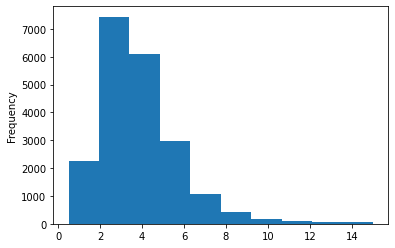

In [9]:
import matplotlib.pyplot as plt

housing['median_income'].plot.hist()

In [10]:
median_income= tf.feature_column.numeric_column('median_income')

bucketized_median_income= tf.feature_column.bucketized_column(median_income,boundaries=[1.5,3,4.5,6,7.5])

In [11]:
ocean_prox_vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab)

In [20]:
keywords = tf.feature_column.categorical_column_with_hash_bucket("keywords",
10000)



In [21]:
hola=[keywords]

In [22]:
features = {'keywords': tf.constant([['Tensorflow', 'Keras', 'RNN', 'LSTM',
'CNN'], ['LSTM', 'CNN', 'Tensorflow', 'Keras', 'RNN'], ['CNN', 'Tensorflow',
'LSTM', 'Keras', 'RNN']])}

tf.compat.v1.feature_column.linear_model(features,
hola)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [24]:
import tensorflow_datasets as tfds

In [25]:
dataset = tfds.load(name="mnist")

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [27]:
mnist_train= dataset['train']
mnist_test= dataset['test']

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>